In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [2]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
print("A shape of the dataset: {}".format(data.shape))

A shape of the dataset: (299, 13)


In [4]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [5]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
data_copy = data.copy(deep = True)

data_copy["sex"] = np.where(data_copy["sex"] < 1, "Women", "Men")
data_copy["smoking"] = np.where(data_copy["smoking"] < 1, "No", "Yes")
data_copy["anaemia"] = np.where(data_copy["anaemia"] < 1, "No", "Yes")
data_copy["diabetes"] = np.where(data_copy["diabetes"] < 1, "No", "Yes")
data_copy["high_blood_pressure"] = np.where(data_copy["high_blood_pressure"] < 1, "No", "Yes")

In [7]:
data_copy.dtypes

age                         float64
anaemia                      object
creatinine_phosphokinase      int64
diabetes                     object
ejection_fraction             int64
high_blood_pressure          object
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                          object
smoking                      object
time                          int64
DEATH_EVENT                   int64
dtype: object

In [8]:
data_copy.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,No,582,No,20,Yes,265000.00,1.9,130,Men,No,4,1
1,55.0,No,7861,No,38,No,263358.03,1.1,136,Men,No,6,1
2,65.0,No,146,No,20,No,162000.00,1.3,129,Men,Yes,7,1
3,50.0,Yes,111,No,20,No,210000.00,1.9,137,Men,No,7,1
4,65.0,Yes,160,Yes,20,No,327000.00,2.7,116,Women,No,8,1


In [9]:
round(data_copy.loc[:, ~data_copy.columns.isin(['DEATH_EVENT'])].describe(), 3)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000,299.000,299.000,299.000,299.000,299.000,299.000
mean,60.834,581.839,38.084,263358.029,1.394,136.625,130.261
std,11.895,970.288,11.835,97804.237,1.035,4.412,77.614
min,40.000,23.000,14.000,25100.000,0.500,113.000,4.000
25%,51.000,116.500,30.000,212500.000,0.900,134.000,73.000
50%,60.000,250.000,38.000,262000.000,1.100,137.000,115.000
75%,70.000,582.000,45.000,303500.000,1.400,140.000,203.000
max,95.000,7861.000,80.000,850000.000,9.400,148.000,285.000


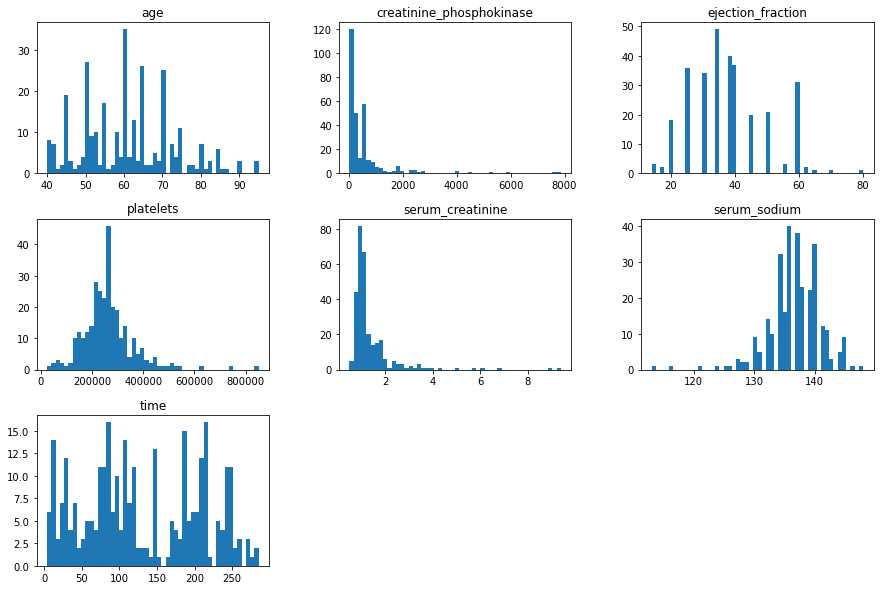

In [10]:
data_copy.loc[:, ~data_copy.columns.isin(['DEATH_EVENT'])].hist(bins = 50, grid = False, figsize = (15,10))

plt.show()

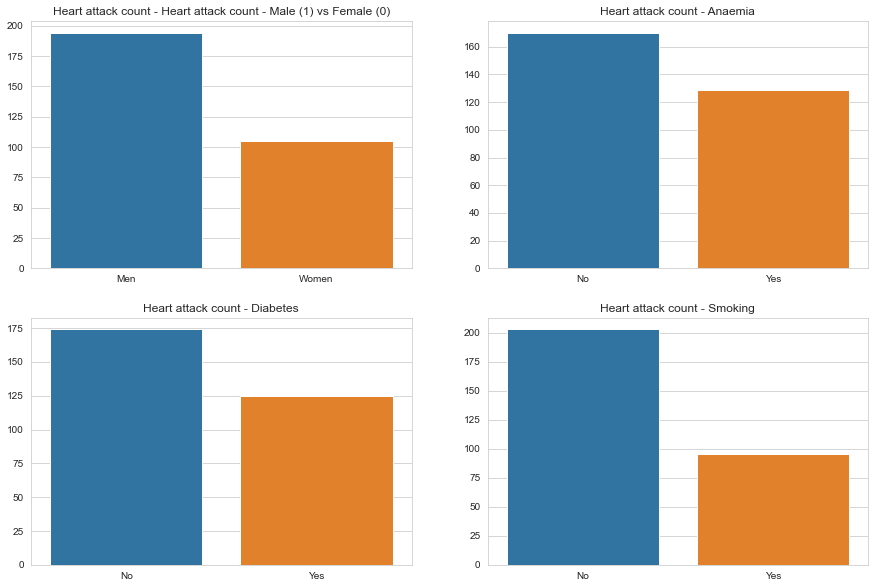

In [11]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10))

plots_1 = {'Heart attack count - Male (1) vs Female (0)' : 'sex', 'Anaemia' : 'anaemia', 
           'Diabetes' : 'diabetes', 'Smoking' : 'smoking'}
i = 0

for item in plots_1.items():
    sns.countplot(x = item[1], data = data_copy, ax = ax.flatten()[i]).set(title = 'Heart attack count - {}'.format(item[0]), xlabel = None, ylabel = None)
    i += 1

plt.show()

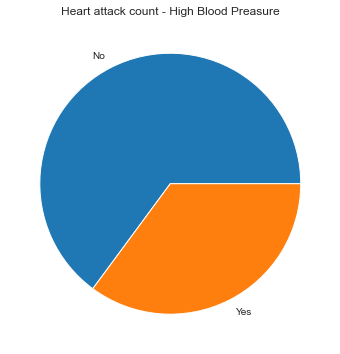

In [13]:
hbp = data_copy['high_blood_pressure'].value_counts()
hbp.plot(kind = "pie", figsize = (9,6))

plt.xlabel(None)
plt.ylabel(None)
plt.title('Heart attack count - High Blood Preasure')

plt.show()

In [14]:
print('Min. age: {}\t Max. age: {}'.format(min(data_copy['age']), max(data_copy['age'])))

Min. age: 40.0	 Max. age: 95.0


In [15]:
labels = ['40 - 49', '50 - 59', '60 - 69', '70 - 79', '80 - 89', '90 - 99']
data_copy['age_group'] = pd.cut(data_copy['age'], bins = np.arange(40, 110, 10), labels = labels, right = False)

data_copy.insert(1, 'age_group', data_copy.pop('age_group'))

In [16]:
data_copy.head()

,age,age_group,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,70 - 79,No,582,No,20,Yes,265000.00,1.9,130,Men,No,4,1
1,55.0,50 - 59,No,7861,No,38,No,263358.03,1.1,136,Men,No,6,1
2,65.0,60 - 69,No,146,No,20,No,162000.00,1.3,129,Men,Yes,7,1
3,50.0,50 - 59,Yes,111,No,20,No,210000.00,1.9,137,Men,No,7,1
4,65.0,60 - 69,Yes,160,Yes,20,No,327000.00,2.7,116,Women,No,8,1


In [17]:
prob = pd.DataFrame(data_copy[['age_group','DEATH_EVENT']].groupby('age_group').mean())
prob.rename(columns = {'DEATH_EVENT' : ''}, inplace = True)

prob

,
age_group,
40 - 49,0.234043
50 - 59,0.243902
60 - 69,0.290323
70 - 79,0.384615
80 - 89,0.684211
90 - 99,0.833333


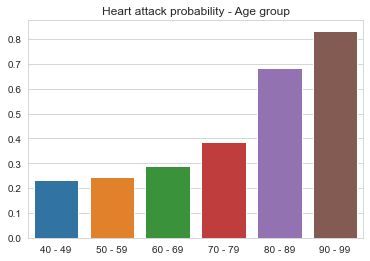

In [18]:
sns.set_style("whitegrid")
sns.barplot('age_group', 'DEATH_EVENT', data = data_copy, ci = None)

plt.title('Heart attack probability - Age group')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

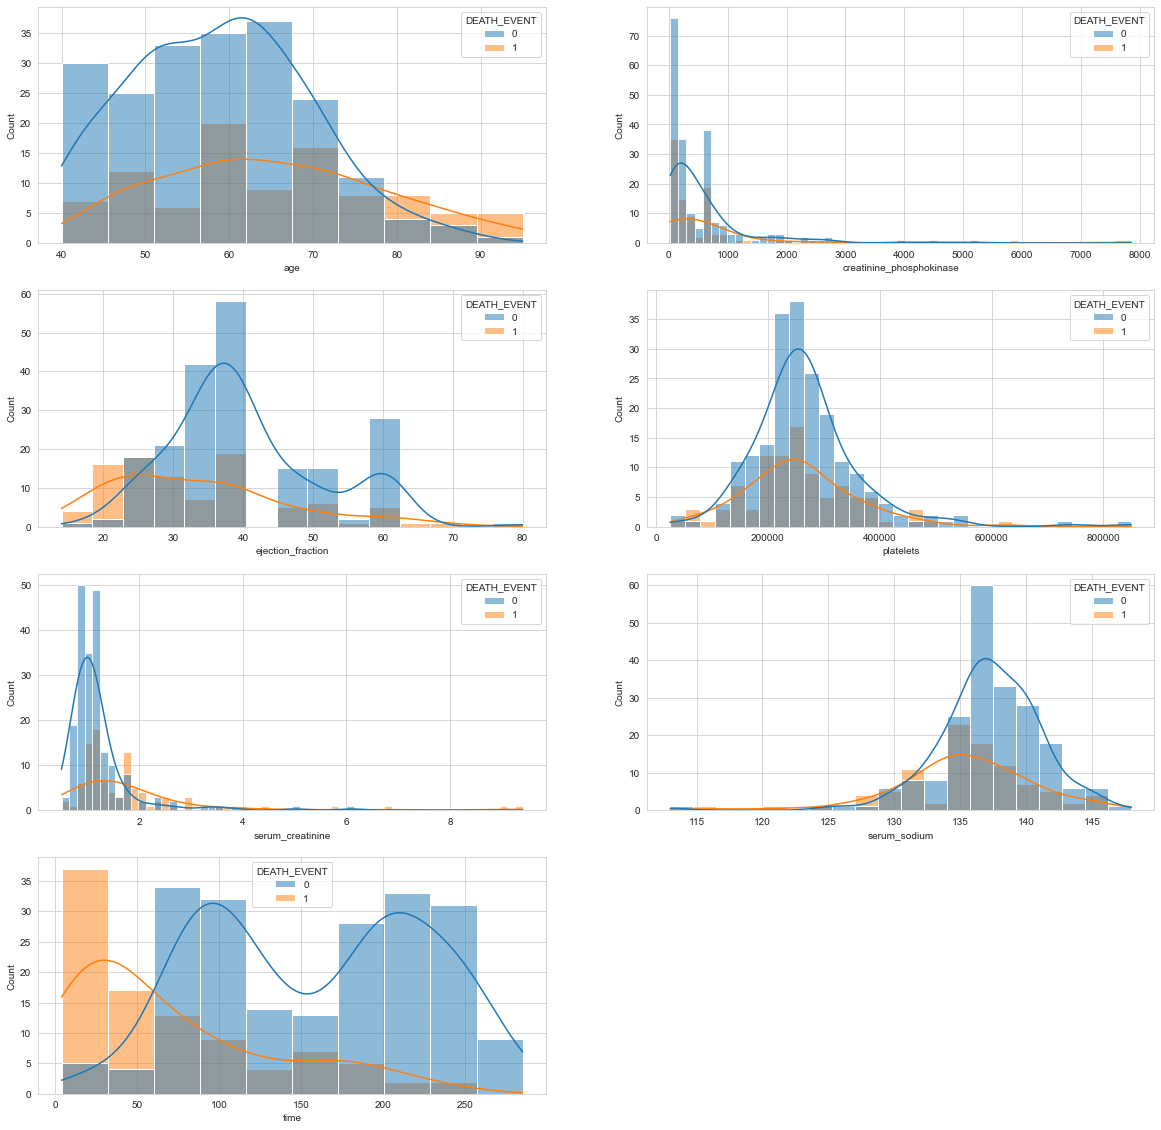

In [19]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (20,20))

columns = list(data_copy.select_dtypes([int,float]).columns)

for i, n in enumerate(columns):
    sns.histplot(data = data_copy, x = n, hue = "DEATH_EVENT", kde = True, ax = ax.flatten()[i])


ax.flatten()[-1].set_visible(False)
plt.show()

-------------

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn import tree

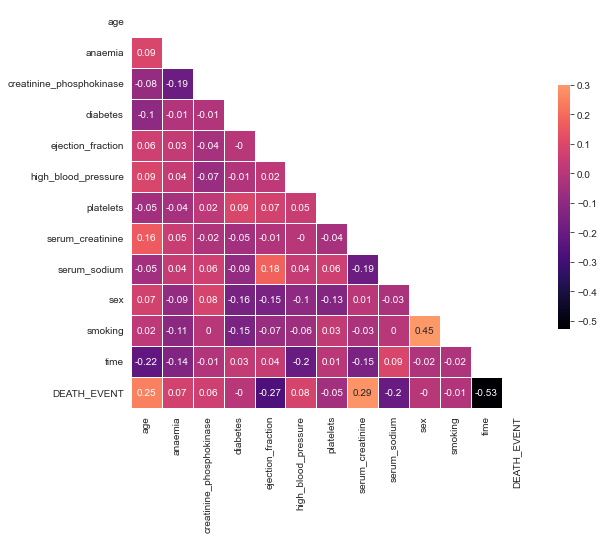

In [21]:
plt.figure(figsize = (9, 9))

corr = round(data.corr(), 2)
mask = np.triu(np.ones_like(corr, dtype = bool))
cmap = sns.color_palette("magma", as_cmap = True)

sns.heatmap(corr, cmap = cmap, annot = True, mask = mask, vmax = .3, center = 0, 
            square = True, linewidths = 0.5, cbar_kws = {"shrink": .5})

plt.show()

In [22]:
X_cat = data[['anaemia','diabetes', 'high_blood_pressure', 'sex', 'smoking']]
X_num = data.drop(['anaemia','diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT'], axis = 1)

X_cat = pd.get_dummies(X_cat)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

X_scaled = pd.DataFrame(X_scaled, index = X_num.index, columns = X_num.columns)
X = pd.concat([X_scaled, X_cat], axis = 1)

y = data['DEATH_EVENT']

In [23]:
X.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879,1,1,0,0,0


In [25]:
names = ['Logistic Regression', 'RandomForest Classifier', 'K Neighbors Classifier', 'Decision Tree Classifier', 
        'Gaussian NB', 'Linear SVC', 'SVC']

models = [LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(), DecisionTreeClassifier(), GaussianNB(),
         SVC(), LinearSVC()]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2022)

results = pd.DataFrame(columns = ['ACC Score', 'RE Score', 'ROC AUC'], index = names)
scores_acc = []
scores_rec = []
scores_roc = []

for model in models:
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    score1 = accuracy_score(y_test, y_pred)
    score2 = recall_score(y_test, y_pred)
    score3 = roc_auc_score(y_test, y_pred)
    scores_acc.append(score1)
    scores_rec.append(score2)
    scores_roc.append(score3)
    
results['ACC Score'] = scores_acc
results['RE Score'] = scores_rec
results['ROC AUC'] = scores_roc
results.sort_values(by = 'ACC Score', ascending = False)

,ACC Score,RE Score,ROC AUC
RandomForest Classifier,0.833333,0.739130,0.815511
Decision Tree Classifier,0.816667,0.782609,0.810223
Logistic Regression,0.800000,0.652174,0.772033
Linear SVC,0.783333,0.608696,0.750294
SVC,0.783333,0.608696,0.750294
K Neighbors Classifier,0.733333,0.434783,0.676851
Gaussian NB,0.716667,0.391304,0.655112


In [26]:
rf = RandomForestClassifier(random_state = 2022)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('\nParameters currently in use:\n\n{}'.format(rf.get_params()))

Accuracy score: 0.8333333333333334

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 2022, 'verbose': 0, 'warm_start': False}


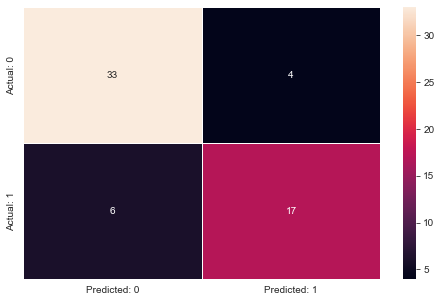

In [27]:
plt.figure(figsize = (8,5))

cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual: 0', 'Actual: 1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', linewidths=.5)

plt.show()

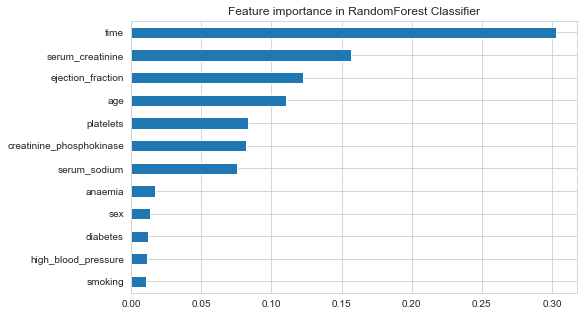

In [28]:
plt.figure(figsize = (8,5))

importances_rf = pd.Series(rf.feature_importances_, index = X.columns)
sort = importances_rf.sort_values()
sort.plot(kind = 'barh')

plt.title('Feature importance in RandomForest Classifier')
plt.show()

In [30]:
params = {'bootstrap': [True, False], 'max_depth': [None, 5, 10, 20, 30, 40], 'max_features': ['auto', 'sqrt'],
          'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [10, 50, 100, 150, 200],
         'criterion': ['gini', 'entropy']}

grid = GridSearchCV(estimator = rf, param_grid = params, cv = 3, n_jobs = -1, verbose = 1, scoring = 'accuracy')
grid.fit(X_train, y_train)

Fitting 3 folds for each of 2160 candidates, totalling 6480 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=2022),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20, 30, 40],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [31]:
rf_best = grid.best_estimator_
print('Accuracy score after Hyperparameter Tuning: {}'.format(accuracy_score(y_test, rf_best.predict(X_test))))
print('\nBest estimator of the RandomForest Classifier:\n\n{}'.format(grid.best_estimator_))

Accuracy score after Hyperparameter Tuning: 0.85

Best estimator of the RandomForest Classifier:

RandomForestClassifier(max_depth=5, min_samples_split=10, random_state=2022)


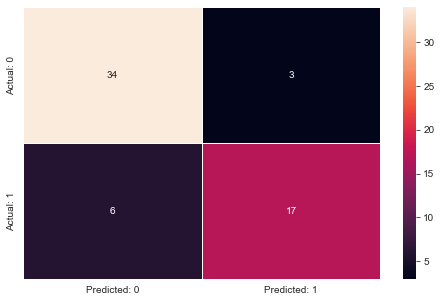

In [32]:
plt.figure(figsize = (8,5))

cm = confusion_matrix(y_test, rf_best.predict(X_test))
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual: 0', 'Actual: 1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', linewidths=.5)

plt.show()

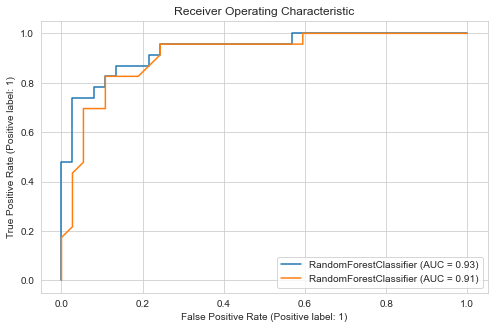

In [33]:
fig = plt.figure(figsize = (8,5))

ax = fig.gca()
plot_roc_curve(rf_best, X_test, y_test, ax = ax)
plot_roc_curve(rf, X_test, y_test, ax = ax)

plt.title('Receiver Operating Characteristic')
plt.show()

------

<div style="text-align: right"> <b>Author:</b> Dawid Kapcia </div>